# Análisis de Comentarios

In [6]:
# Importamos las librerías

import nltk
import pandas as pd
from datetime import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from nltk.tokenize import RegexpTokenizer

import gensim
from gensim import corpora
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

###Diccionarios en español para el análisis de polaridad
nltk.download('punkt')
# Tokenización
# Descargar el conjunto de stopwords en español si no lo tienes
nltk.download('stopwords')
# Análisis de polaridad
# Obtención de listado de stopwords del inglés
stop_words = list(stopwords.words('spanish'))

[nltk_data] Downloading package punkt to /home/cygnus/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/cygnus/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
df_coments_a = pd.read_csv("twitter_coments_lomeli.csv", usecols=["css-901oao 4"])
df_coments_b = pd.read_csv("twitter_coments_lomeli_3.csv", usecols=["css-901oao 8"])

# Renombramos la columnas

df_coments_a = df_coments_a.rename(columns={"css-901oao 4": "texto"})
df_coments_b = df_coments_b.rename(columns={"css-901oao 8": "texto"})

In [8]:
df_coments_b

,texto
0,"Los 3 niveles de gobierno están pal perro, per..."
1,NaN
2,¿Qué más les queda para alcanzar el hueso?
3,Con que cara
4,es el bueno
...,...
539,Mintiendo hasta en eso.
540,"Dice, desconozco los que las pintaron, pero se..."
541,Entonces usted por su propia mano borrelos
542,No junta ni 100 likes en sus post y resulta qu...


In [111]:
df_coments = pd.concat([df_coments_a, df_coments_b])
df_coments = df_coments.dropna()
df_coments['texto'] = df_coments['texto'].str.lower()
tokenizer = RegexpTokenizer(r'\w+')
df_coments['tokens'] = df_coments['texto'].apply(tokenizer.tokenize)
df_coments.to_csv("coments_x.csv")

import re

def limpiar_texto(texto):
    # Eliminar caracteres especiales y números
    texto_limpio = re.sub(r'[^\w\sáéíóúüÁÉÍÓÚÜñ]', '', texto, flags=re.UNICODE)
    # Eliminar espacios en blanco adicionales y convertir a minúsculas
    texto_limpio = ' '.join(texto_limpio.split()).lower()
    return texto_limpio


# Define una función para eliminar los números de una cadena de texto
def remove_numbers_from_text(text):
    words = text.split()  # Divide el texto en palabras
    words_without_numbers = [word for word in words if not word.isdigit()]  
    return ' '.join(words_without_numbers)  

df_coments['texto'] = df_coments['texto'].apply(remove_numbers_from_text)

df_coments["texto"] = df_coments["texto"].apply(limpiar_texto)
df_posts_clean = df_coments.copy()
df_coments

,texto,tokens
0,la encuestadora,"[la, encuestadora]"
1,aquí ni pío dicen,"[aquí, ni, pío, dicen]"
2,,[4]
3,de que sirven la guardia nacional y el ejércit...,"[de, que, sirven, la, guardia, nacional, y, el..."
4,jalisco está con el mejor con el doctor carlos...,"[jalisco, está, con, el, mejor, con, el, docto..."
...,...,...
538,a él no le toca es regidor en guadalajara,"[a, él, no, le, toca, es, regidor, en, guadala..."
539,mintiendo hasta en eso,"[mintiendo, hasta, en, eso]"
540,dice desconozco los que las pintaron pero se l...,"[dice, desconozco, los, que, las, pintaron, pe..."
541,entonces usted por su propia mano borrelos,"[entonces, usted, por, su, propia, mano, borre..."


In [112]:
# Se añade la stoprword: amp, ax, ex
stop_words.extend(("q", "d", "van", "si", "pa", "así", "ser", "solo", "tan", "va", "as", "aquí", "hacia","dra", "día","hoy",
                "le", "con","ella", "qué", "por", "qu", "ers", "das", "ve", "jajaja", "jeje", "La", "nimo", "ms", "da", "vas",
                "jajajajaja", "dr"))

In [113]:
tweets_tidy = df_coments.copy()

In [114]:
##########NUBE DE PALABRAS
def preprocess_text(text):
    words = text # Tokenizar y convertir a minúsculas
    words = [word for word in words if word.isalpha()]  # Eliminar caracteres no alfabéticos
    words = [word for word in words if word not in stop_words]  # Eliminar palabras vacías
    return words


preprocessed_text = tweets_tidy["tokens"].apply(preprocess_text)

preprocessed_text

0                                         [encuestadora]
1                                           [pío, dicen]
2                                                     []
3      [sirven, guardia, nacional, ejército, sirve, m...
4               [jalisco, mejor, doctor, carlos, lomelí]
                             ...                        
538                         [toca, regidor, guadalajara]
539                                          [mintiendo]
540       [dice, desconozco, pintaron, agradezco, ánimo]
541            [entonces, usted, propia, mano, borrelos]
542    [junta, likes, post, resulta, gaste, dinero, b...
Name: tokens, Length: 1131, dtype: object

In [115]:
# Unimos todas las listas de palabras en una sola lista
all_words = [word for sublist in preprocessed_text.values for word in sublist]

# Creamos un DataFrame con las palabras y sus frecuencias
word_counts = pd.Series(all_words).value_counts()

# Tomamos las palabras más comunes (puedes ajustar este valor según tus necesidades)
top_words = word_counts.head(10)
top_words.to_csv("top_words_posts.csv")
type(top_words)

pandas.core.series.Series

In [116]:
word_counts

jalisco      120
morena        73
chema         54
clara         40
mejor         34
            ... 
marchito       1
violentos      1
chale          1
voy            1
gaste          1
Name: count, Length: 2310, dtype: int64

/home/cygnus/.local/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


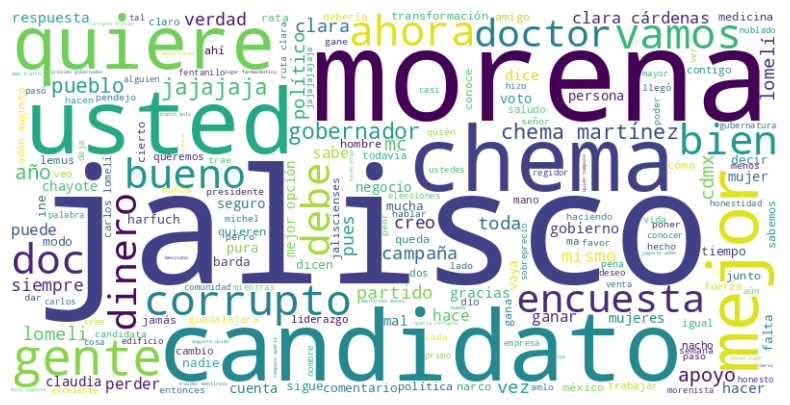

In [117]:
# Unir las palabras en un solo texto (separadas por espacios)
texto = " ".join(all_words)
# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(texto)
# Mostrar la nube de palabras utilizando matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Desactivar ejes
plt.show()

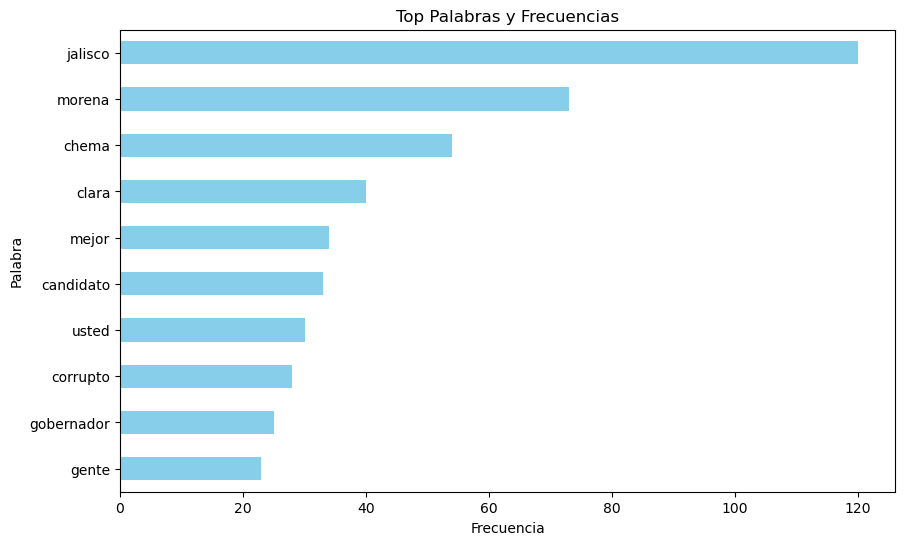

In [118]:
# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
top_words.plot(kind='barh', color='skyblue')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Top Palabras y Frecuencias')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la palabra con la frecuencia más alta en la parte superior
plt.show()

In [120]:
# Define una función para filtrar números de una lista de tokens
def remove_numbers(tokens):
    return [token for token in tokens if not token.isdigit()]

# Aplica la función a la columna 'tokens' para eliminar números
tweets_tidy['tokens'] = tweets_tidy['tokens'].apply(remove_numbers)

tweets_tidy.tokens

0                                     [la, encuestadora]
1                                 [aquí, ni, pío, dicen]
2                                                     []
3      [de, que, sirven, la, guardia, nacional, y, el...
4      [jalisco, está, con, el, mejor, con, el, docto...
                             ...                        
538    [a, él, no, le, toca, es, regidor, en, guadala...
539                          [mintiendo, hasta, en, eso]
540    [dice, desconozco, los, que, las, pintaron, pe...
541    [entonces, usted, por, su, propia, mano, borre...
542    [no, junta, ni, likes, en, sus, post, y, resul...
Name: tokens, Length: 1131, dtype: object

In [121]:
texts = tweets_tidy.tokens

punctuation = set(string.punctuation)

texts = [[word for word in doc if word not in stop_words and word not in punctuation] for doc in texts]

# Crear un diccionario de términos a partir del corpus
dictionary = corpora.Dictionary(texts)

# Crear una representación vectorial del corpus
corpus = [dictionary.doc2bow(text) for text in texts]

In [122]:
# Entrenar el modelo LDA
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Obtener los temas y sus palabras clave
topics = lda_model.print_topics(num_words=10)

# Mostrar los temas y sus palabras clave
for topic in topics:
    print(topic)

(0, '0.013*"corrupto" + 0.012*"ahora" + 0.008*"creo" + 0.008*"quién" + 0.006*"augusto" + 0.006*"candidato" + 0.006*"pues" + 0.006*"mentiroso" + 0.006*"tampoco" + 0.006*"quería"')
(1, '0.040*"jalisco" + 0.021*"chema" + 0.014*"mejor" + 0.014*"morena" + 0.010*"vamos" + 0.009*"martínez" + 0.008*"gobernador" + 0.008*"lomelí" + 0.008*"pueblo" + 0.007*"doctor"')
(2, '0.007*"chema" + 0.005*"cuenta" + 0.005*"semana" + 0.005*"llegó" + 0.005*"mayor" + 0.005*"excelente" + 0.005*"veo" + 0.005*"chayote" + 0.005*"apoyo" + 0.004*"cierto"')
(3, '0.022*"clara" + 0.018*"jalisco" + 0.010*"morena" + 0.009*"cárdenas" + 0.006*"candidato" + 0.004*"campaña" + 0.004*"ruta" + 0.004*"siempre" + 0.004*"cdmx" + 0.004*"seguro"')
(4, '0.013*"morena" + 0.007*"usted" + 0.006*"respuesta" + 0.005*"ganar" + 0.005*"doc" + 0.005*"jalisco" + 0.004*"mejor" + 0.004*"mismo" + 0.004*"queda" + 0.004*"dicen"')


In [123]:
print(topics)

[(0, '0.013*"corrupto" + 0.012*"ahora" + 0.008*"creo" + 0.008*"quién" + 0.006*"augusto" + 0.006*"candidato" + 0.006*"pues" + 0.006*"mentiroso" + 0.006*"tampoco" + 0.006*"quería"'), (1, '0.040*"jalisco" + 0.021*"chema" + 0.014*"mejor" + 0.014*"morena" + 0.010*"vamos" + 0.009*"martínez" + 0.008*"gobernador" + 0.008*"lomelí" + 0.008*"pueblo" + 0.007*"doctor"'), (2, '0.007*"chema" + 0.005*"cuenta" + 0.005*"semana" + 0.005*"llegó" + 0.005*"mayor" + 0.005*"excelente" + 0.005*"veo" + 0.005*"chayote" + 0.005*"apoyo" + 0.004*"cierto"'), (3, '0.022*"clara" + 0.018*"jalisco" + 0.010*"morena" + 0.009*"cárdenas" + 0.006*"candidato" + 0.004*"campaña" + 0.004*"ruta" + 0.004*"siempre" + 0.004*"cdmx" + 0.004*"seguro"'), (4, '0.013*"morena" + 0.007*"usted" + 0.006*"respuesta" + 0.005*"ganar" + 0.005*"doc" + 0.005*"jalisco" + 0.004*"mejor" + 0.004*"mismo" + 0.004*"queda" + 0.004*"dicen"')]


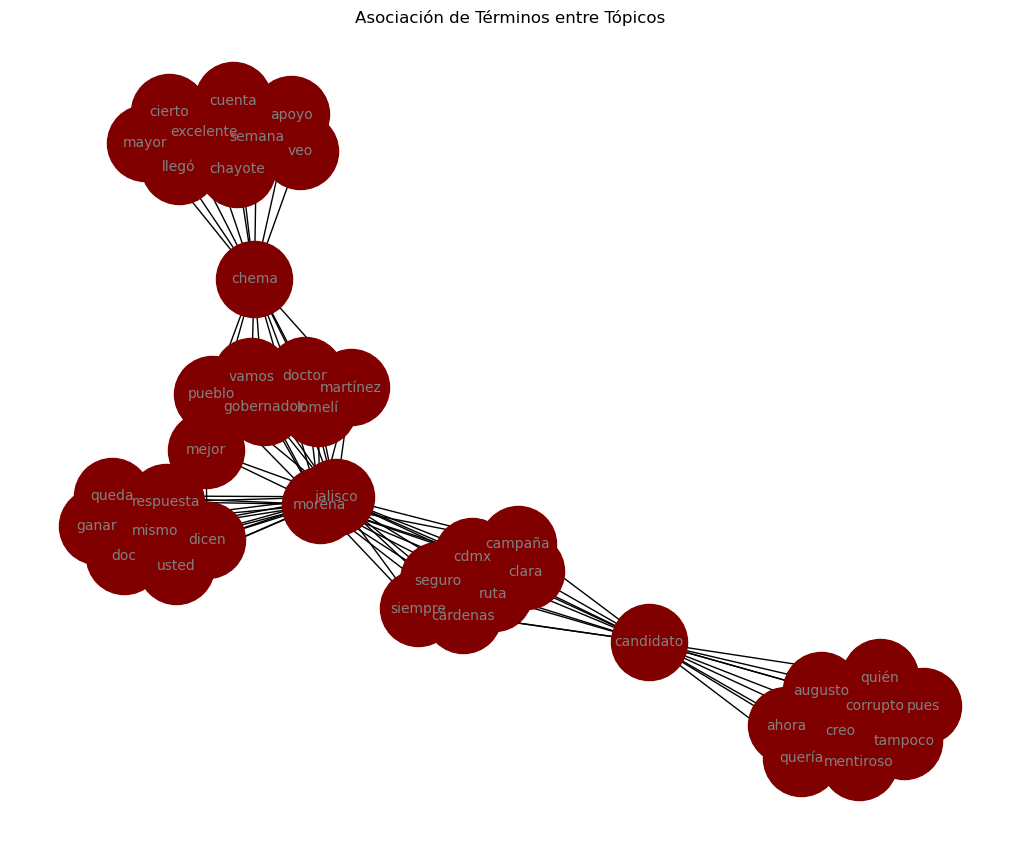

In [124]:
import networkx as nx

# Crear un grafo de red
G = nx.Graph()

# Procesar los tópicos y sus palabras clave para identificar asociaciones
for topic_id, topic_words in topics:
    # Dividir las palabras clave en términos individuales
    terms = [term.split('*')[1].strip('"') for term in topic_words.split(' + ')]
    
    # Agregar una arista entre todos los términos del tópico
    for i in range(len(terms)):
        for j in range(i + 1, len(terms)):
            term1, term2 = terms[i], terms[j]
            G.add_edge(term1, term2, topic=topic_id)

# Dibujar el gráfico de red
pos = nx.spring_layout(G, k=0.3, iterations=50)
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, font_size=10, node_size=3000, node_color='maroon', font_color='gray')

# Mostrar el gráfico de red
plt.title('Asociación de Términos entre Tópicos')
# Guardar la figura como una imagen
plt.savefig('topicos.png', bbox_inches='tight', dpi=300)
plt.show()

# Opción 2 de Topics

In [125]:
tweets_tidy

,texto,tokens
0,la encuestadora,"[la, encuestadora]"
1,aquí ni pío dicen,"[aquí, ni, pío, dicen]"
2,,[]
3,de que sirven la guardia nacional y el ejércit...,"[de, que, sirven, la, guardia, nacional, y, el..."
4,jalisco está con el mejor con el doctor carlos...,"[jalisco, está, con, el, mejor, con, el, docto..."
...,...,...
538,a él no le toca es regidor en guadalajara,"[a, él, no, le, toca, es, regidor, en, guadala..."
539,mintiendo hasta en eso,"[mintiendo, hasta, en, eso]"
540,dice desconozco los que las pintaron pero se l...,"[dice, desconozco, los, que, las, pintaron, pe..."
541,entonces usted por su propia mano borrelos,"[entonces, usted, por, su, propia, mano, borre..."


In [126]:
import spacy

nlp = spacy.load("es_core_news_sm")

# Función para preprocesar el texto
def preprocess_text(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]

# Aplicar el preprocesamiento a cada fila del DataFrame
tweets_tidy['texto_preprocesado'] = tweets_tidy.texto.apply(preprocess_text)
tweets_tidy

,texto,tokens,texto_preprocesado
0,la encuestadora,"[la, encuestadora]",[encuestadora]
1,aquí ni pío dicen,"[aquí, ni, pío, dicen]",[pío]
2,,[],[]
3,de que sirven la guardia nacional y el ejércit...,"[de, que, sirven, la, guardia, nacional, y, el...","[servir, guardia, nacional, ejército, servir, ..."
4,jalisco está con el mejor con el doctor carlos...,"[jalisco, está, con, el, mejor, con, el, docto...","[jalisco, doctor, carlos, lomelí]"
...,...,...,...
538,a él no le toca es regidor en guadalajara,"[a, él, no, le, toca, es, regidor, en, guadala...","[tocar, regidor, guadalajara]"
539,mintiendo hasta en eso,"[mintiendo, hasta, en, eso]",[mentir]
540,dice desconozco los que las pintaron pero se l...,"[dice, desconozco, los, que, las, pintaron, pe...","[desconozco, pintar, agradecer, ánimo]"
541,entonces usted por su propia mano borrelos,"[entonces, usted, por, su, propia, mano, borre...","[mano, borre él]"


In [127]:
from gensim import corpora

# Crear un diccionario a partir de los documentos preprocesados
dictionary = corpora.Dictionary(tweets_tidy['texto_preprocesado'])

# Crear una representación BoW de los documentos
corpus = [dictionary.doc2bow(texto) for texto in tweets_tidy['texto_preprocesado']]

In [128]:
from gensim.models import LdaModel

num_topics = 5  # Ajusta el número de tópicos según tus necesidades
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

In [129]:
# Obtener los temas y sus palabras clave
topics = lda_model.print_topics(num_words=10)

# Mostrar los temas y sus palabras clave
for topic in topics:
    print(topic)

(0, '0.023*"chema" + 0.017*"corrupto" + 0.015*"martínez" + 0.014*"candidato" + 0.014*"jalisco" + 0.010*"mujer" + 0.009*"encuesta" + 0.009*"chemo" + 0.007*"deber" + 0.007*"quedar"')
(1, '0.045*"jalisco" + 0.018*"morena" + 0.015*"claro" + 0.015*"dr" + 0.013*"ver" + 0.010*"tener" + 0.009*"gente" + 0.009*"lomelí" + 0.008*"lomeli" + 0.008*"cárdena"')
(2, '0.013*"ganar" + 0.010*"mc" + 0.009*"seguro" + 0.008*"jalisco" + 0.008*"morena" + 0.007*"claudia" + 0.007*"tener" + 0.006*"claro" + 0.006*"querer" + 0.006*"gobierno"')
(3, '0.012*"poner" + 0.011*"querer" + 0.009*"corrupto" + 0.008*"lugar" + 0.008*"farmacéutico" + 0.008*"cdmx" + 0.007*"harfuch" + 0.007*"mentiroso" + 0.007*"dinero" + 0.007*"vender"')
(4, '0.011*"perder" + 0.008*"pasar" + 0.007*"volver" + 0.007*"negocio" + 0.007*"político" + 0.007*"cambio" + 0.006*"rata" + 0.006*"mano" + 0.005*"jalisco" + 0.005*"puro"')


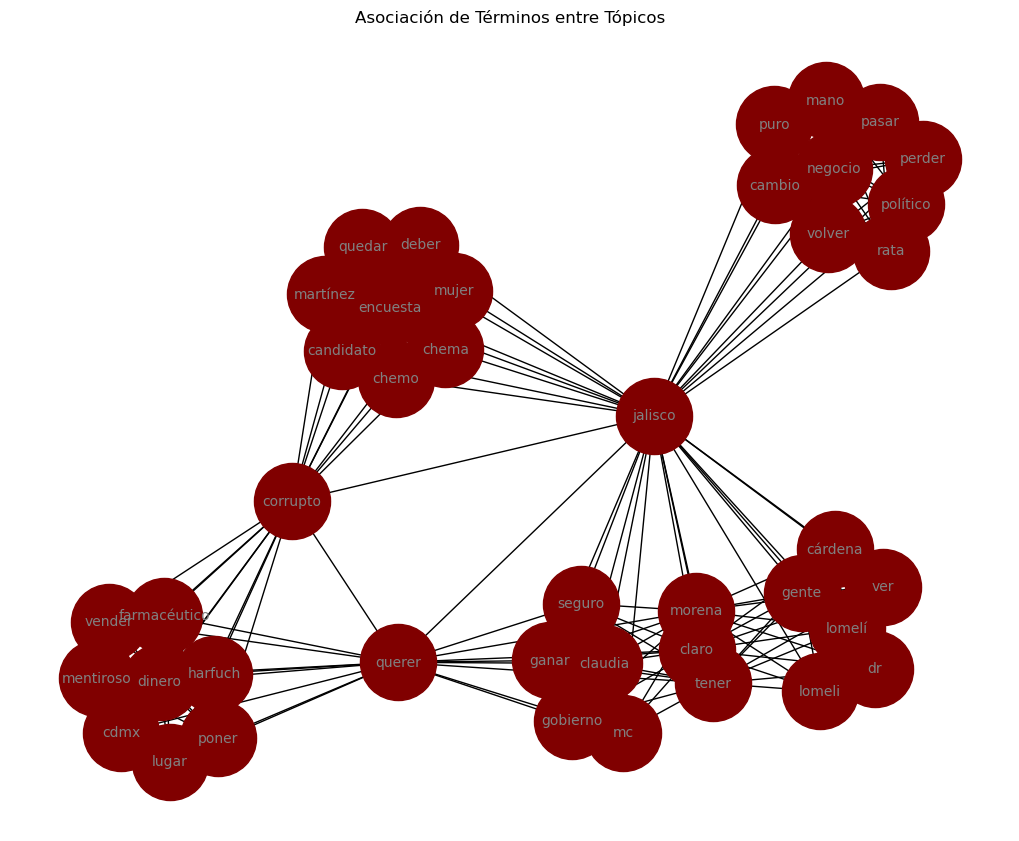

In [130]:
import networkx as nx

# Crear un grafo de red
G = nx.Graph()

# Procesar los tópicos y sus palabras clave para identificar asociaciones
for topic_id, topic_words in topics:
    # Dividir las palabras clave en términos individuales
    terms = [term.split('*')[1].strip('"') for term in topic_words.split(' + ')]
    
    # Agregar una arista entre todos los términos del tópico
    for i in range(len(terms)):
        for j in range(i + 1, len(terms)):
            term1, term2 = terms[i], terms[j]
            G.add_edge(term1, term2, topic=topic_id)

# Dibujar el gráfico de red
pos = nx.spring_layout(G, k=0.3, iterations=50)
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, font_size=10, node_size=3000, node_color='maroon', font_color='gray')

# Mostrar el gráfico de red
plt.title('Asociación de Términos entre Tópicos')
# Guardar la figura como una imagen
plt.savefig('topicos.png', bbox_inches='tight', dpi=300)
plt.show()

In [131]:
import pandas as pd
import spacy
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

# Generación de bigramas con spaCy
nlp = spacy.load("es_core_news_sm")

def generar_bigramas_spacy(texto):
    doc = nlp(texto)
    bigramas = [(doc[i].text, doc[i + 1].text) for i in range(len(doc) - 1)]
    return bigramas

df_posts_clean['bigramas_spacy'] = df_posts_clean['texto'].apply(generar_bigramas_spacy)

# Generación de bigramas con NLTK
def generar_bigramas_nltk(texto):
    tokens = word_tokenize(texto)
    bigramas = list(ngrams(tokens, 3))
    return bigramas

df_posts_clean['bigramas_nltk'] = df_posts_clean['texto'].apply(generar_bigramas_nltk)

# Visualización del DataFrame resultante
df_posts_clean

,texto,tokens,bigramas_spacy,bigramas_nltk
0,la encuestadora,"[la, encuestadora]","[(la, encuestadora)]",[]
1,aquí ni pío dicen,"[aquí, ni, pío, dicen]","[(aquí, ni), (ni, pío), (pío, dicen)]","[(aquí, ni, pío), (ni, pío, dicen)]"
2,,[4],[],[]
3,de que sirven la guardia nacional y el ejércit...,"[de, que, sirven, la, guardia, nacional, y, el...","[(de, que), (que, sirven), (sirven, la), (la, ...","[(de, que, sirven), (que, sirven, la), (sirven..."
4,jalisco está con el mejor con el doctor carlos...,"[jalisco, está, con, el, mejor, con, el, docto...","[(jalisco, está), (está, con), (con, el), (el,...","[(jalisco, está, con), (está, con, el), (con, ..."
...,...,...,...,...
538,a él no le toca es regidor en guadalajara,"[a, él, no, le, toca, es, regidor, en, guadala...","[(a, él), (él, no), (no, le), (le, toca), (toc...","[(a, él, no), (él, no, le), (no, le, toca), (l..."
539,mintiendo hasta en eso,"[mintiendo, hasta, en, eso]","[(mintiendo, hasta), (hasta, en), (en, eso)]","[(mintiendo, hasta, en), (hasta, en, eso)]"
540,dice desconozco los que las pintaron pero se l...,"[dice, desconozco, los, que, las, pintaron, pe...","[(dice, desconozco), (desconozco, los), (los, ...","[(dice, desconozco, los), (desconozco, los, qu..."
541,entonces usted por su propia mano borrelos,"[entonces, usted, por, su, propia, mano, borre...","[(entonces, usted), (usted, por), (por, su), (...","[(entonces, usted, por), (usted, por, su), (po..."


In [132]:
from nltk.collocations import *

flatten_corpus = [w for l in df_posts_clean.bigramas_spacy for w in l]

treshold = 4

bigrams = [bigram for bigram in flatten_corpus if len(bigram[0])>treshold and len(bigram[1])>treshold]

In [133]:
bigram_measure = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_documents(bigrams)
finder.apply_freq_filter(5)
colocaciones = finder.nbest(bigram_measure.pmi, 10)

In [134]:
colocaciones

[('lugar', 'farmacéutico'),
 ('próximo', 'gobernador'),
 ('corrupto', 'traidor'),
 ('augusto', 'quién'),
 ('mejor', 'opción'),
 ('chema', 'martinez'),
 ('quién', 'tampoco'),
 ('carlos', 'lomelí'),
 ('clara', 'cárdenas'),
 ('chema', 'martínez')]

In [135]:
df_posts_clean

,texto,tokens,bigramas_spacy,bigramas_nltk
0,la encuestadora,"[la, encuestadora]","[(la, encuestadora)]",[]
1,aquí ni pío dicen,"[aquí, ni, pío, dicen]","[(aquí, ni), (ni, pío), (pío, dicen)]","[(aquí, ni, pío), (ni, pío, dicen)]"
2,,[4],[],[]
3,de que sirven la guardia nacional y el ejércit...,"[de, que, sirven, la, guardia, nacional, y, el...","[(de, que), (que, sirven), (sirven, la), (la, ...","[(de, que, sirven), (que, sirven, la), (sirven..."
4,jalisco está con el mejor con el doctor carlos...,"[jalisco, está, con, el, mejor, con, el, docto...","[(jalisco, está), (está, con), (con, el), (el,...","[(jalisco, está, con), (está, con, el), (con, ..."
...,...,...,...,...
538,a él no le toca es regidor en guadalajara,"[a, él, no, le, toca, es, regidor, en, guadala...","[(a, él), (él, no), (no, le), (le, toca), (toc...","[(a, él, no), (él, no, le), (no, le, toca), (l..."
539,mintiendo hasta en eso,"[mintiendo, hasta, en, eso]","[(mintiendo, hasta), (hasta, en), (en, eso)]","[(mintiendo, hasta, en), (hasta, en, eso)]"
540,dice desconozco los que las pintaron pero se l...,"[dice, desconozco, los, que, las, pintaron, pe...","[(dice, desconozco), (desconozco, los), (los, ...","[(dice, desconozco, los), (desconozco, los, qu..."
541,entonces usted por su propia mano borrelos,"[entonces, usted, por, su, propia, mano, borre...","[(entonces, usted), (usted, por), (por, su), (...","[(entonces, usted, por), (usted, por, su), (po..."


In [137]:
import pandas as pd
import spacy

# Cargar el modelo de spaCy en español
nlp = spacy.load("es_core_news_sm")

# Función para lematizar el texto
def lematizar_texto(texto):
    doc = nlp(texto)
    lemas = [token.lemma_ for token in doc]
    return " ".join(lemas)

# Aplicar la función de lematización a cada fila del DataFrame
df_posts_clean['texto_lematizado'] = df_posts_clean['texto'].apply(lematizar_texto)

# Visualización del DataFrame resultante
df_posts_clean

,texto,tokens,bigramas_spacy,bigramas_nltk,texto_lematizado
0,la encuestadora,"[la, encuestadora]","[(la, encuestadora)]",[],el encuestadora
1,aquí ni pío dicen,"[aquí, ni, pío, dicen]","[(aquí, ni), (ni, pío), (pío, dicen)]","[(aquí, ni, pío), (ni, pío, dicen)]",aquí ni pío decir
2,,[4],[],[],
3,de que sirven la guardia nacional y el ejércit...,"[de, que, sirven, la, guardia, nacional, y, el...","[(de, que), (que, sirven), (sirven, la), (la, ...","[(de, que, sirven), (que, sirven, la), (sirven...",de que servir el guardia nacional y el ejércit...
4,jalisco está con el mejor con el doctor carlos...,"[jalisco, está, con, el, mejor, con, el, docto...","[(jalisco, está), (está, con), (con, el), (el,...","[(jalisco, está, con), (está, con, el), (con, ...",jalisco estar con el mejor con el doctor carlo...
...,...,...,...,...,...
538,a él no le toca es regidor en guadalajara,"[a, él, no, le, toca, es, regidor, en, guadala...","[(a, él), (él, no), (no, le), (le, toca), (toc...","[(a, él, no), (él, no, le), (no, le, toca), (l...",a él no él tocar ser regidor en guadalajara
539,mintiendo hasta en eso,"[mintiendo, hasta, en, eso]","[(mintiendo, hasta), (hasta, en), (en, eso)]","[(mintiendo, hasta, en), (hasta, en, eso)]",mentir hasta en ese
540,dice desconozco los que las pintaron pero se l...,"[dice, desconozco, los, que, las, pintaron, pe...","[(dice, desconozco), (desconozco, los), (los, ...","[(dice, desconozco, los), (desconozco, los, qu...",decir desconozco el que él pintar pero él él a...
541,entonces usted por su propia mano borrelos,"[entonces, usted, por, su, propia, mano, borre...","[(entonces, usted), (usted, por), (por, su), (...","[(entonces, usted, por), (usted, por, su), (po...",entonces usted por su propio mano borre él


In [140]:
# Aplicar el preprocesamiento a cada fila del DataFrame
df_posts_clean['texto_preprocesado'] = df_posts_clean['texto_lematizado'].apply(preprocess_text)

# Crear un diccionario a partir de los documentos preprocesados
dictionary = corpora.Dictionary(df_posts_clean['texto_preprocesado'])
dictionary.add_documents(colocaciones)  # Agregar n-gramas al diccionario


# Crear una representación BoW de los documentos
corpus = [dictionary.doc2bow(texto) for texto in df_posts_clean['texto_preprocesado']]

num_topics = 5  # Ajusta el número de tópicos según tus necesidades
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Obtener los temas y sus palabras clave
topics = lda_model.print_topics(num_words=10)

# Mostrar los temas y sus palabras clave
for topic in topics:
    print(topic)

(0, '0.039*"jalisco" + 0.017*"corrupto" + 0.015*"querer" + 0.010*"morena" + 0.010*"ganar" + 0.009*"creer" + 0.009*"morén" + 0.008*"doc" + 0.008*"lomelí" + 0.007*"opción"')
(1, '0.020*"querer" + 0.017*"jalisco" + 0.013*"deber" + 0.011*"ganar" + 0.008*"mujer" + 0.007*"dr" + 0.007*"morena" + 0.006*"candidato" + 0.006*"gobernador" + 0.006*"jajaja"')
(2, '0.015*"perder" + 0.011*"respuesta" + 0.008*"candidato" + 0.007*"comentario" + 0.007*"elección" + 0.006*"mujer" + 0.006*"volver" + 0.006*"lomeli" + 0.006*"señor" + 0.006*"perro"')
(3, '0.010*"político" + 0.009*"quedar" + 0.008*"faltar" + 0.008*"llegar" + 0.008*"morena" + 0.008*"jalisco" + 0.007*"traer" + 0.007*"apoyar" + 0.006*"barda" + 0.006*"lemus"')
(4, '0.021*"chema" + 0.016*"martínez" + 0.013*"jalisco" + 0.011*"gobernador" + 0.009*"cárdena" + 0.008*"deber" + 0.007*"morena" + 0.007*"dr" + 0.007*"cdmx" + 0.006*"candidato"')


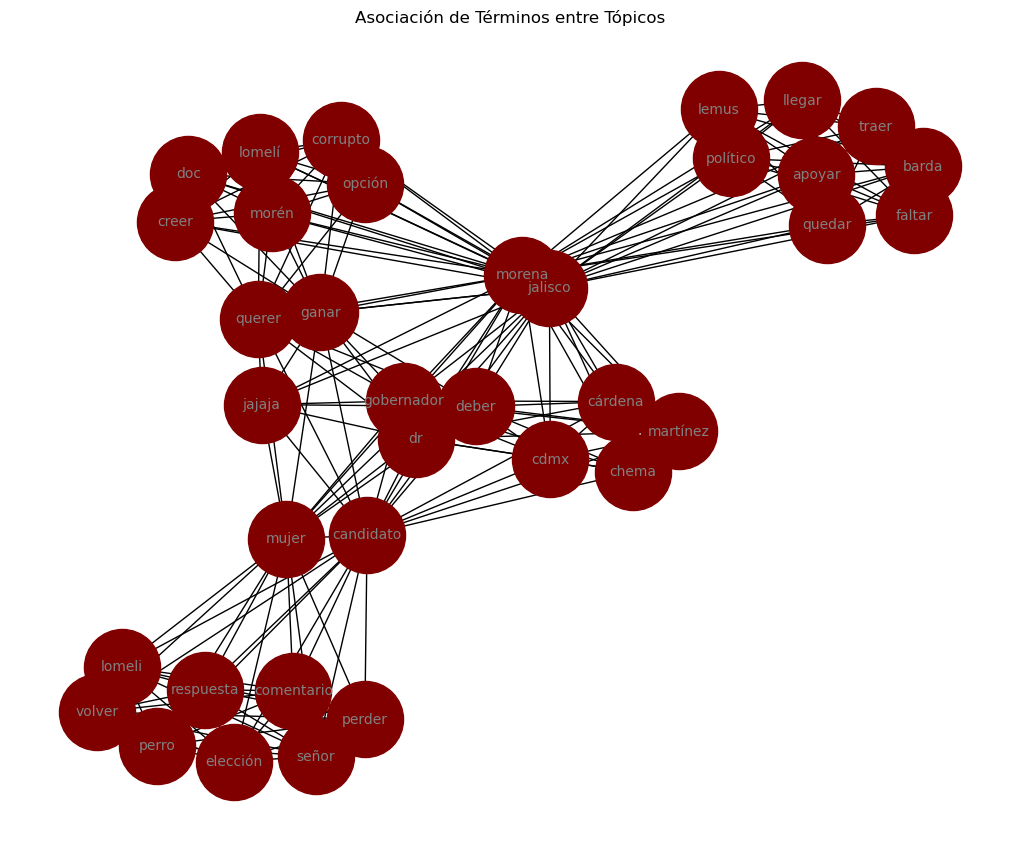

In [141]:
# Crear un grafo de red
G = nx.Graph()

# Procesar los tópicos y sus palabras clave para identificar asociaciones
for topic_id, topic_words in topics:
    # Dividir las palabras clave en términos individuales
    terms = [term.split('*')[1].strip('"') for term in topic_words.split(' + ')]
    
    # Agregar una arista entre todos los términos del tópico
    for i in range(len(terms)):
        for j in range(i + 1, len(terms)):
            term1, term2 = terms[i], terms[j]
            G.add_edge(term1, term2, topic=topic_id)

# Dibujar el gráfico de red
pos = nx.spring_layout(G, k=0.3, iterations=50)
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, font_size=10, node_size=3000, node_color='maroon', font_color='gray')

# Mostrar el gráfico de red
plt.title('Asociación de Términos entre Tópicos')
# Guardar la figura como una imagen
plt.savefig('topicos.png', bbox_inches='tight', dpi=300)
plt.show()

In [142]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Genera la visualización de LDA
lda_display = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)

# Visualiza los tópicos
pyLDAvis.display(lda_display)


In [143]:
topics = lda_model.print_topics(num_words=15)  

topic_data = []
for topic_id, topic in topics:
    topic_words = [word.split('*')[1] for word in topic.split('+')]
    topic_data.append([topic_id, ", ".join(topic_words)])

# DataFrame a partir de los datos de tópicos
df_topics = pd.DataFrame(topic_data, columns=["ID de Tópico", "Palabras Clave"])
print(df_topics)

   ID de Tópico                                     Palabras Clave
0             0  "jalisco" , "corrupto" , "querer" , "morena" ,...
1             1  "querer" , "jalisco" , "deber" , "ganar" , "mu...
2             2  "perder" , "respuesta" , "candidato" , "coment...
3             3  "político" , "quedar" , "faltar" , "llegar" , ...
4             4  "chema" , "martínez" , "jalisco" , "gobernador...


# Análisis de Sentimientos

In [43]:
from sentiment_analysis_spanish import sentiment_analysis

sentiment = sentiment_analysis.SentimentAnalysisSpanish()

/usr/lib64/python3.11/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/lib64/python3.11/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [44]:
# Cálculo de la Polaridad 

def polaridad(texto):
    sentiment = sentiment_analysis.SentimentAnalysisSpanish()
    return sentiment.sentiment(texto)

In [45]:
df_posts_clean["polaridad"] = df_posts_clean["texto"].apply(polaridad)

/usr/lib64/python3.11/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/lib64/python3.11/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [48]:
df_posts_clean.to_csv("df_coments_complete.csv")
df_posts_clean

,texto,tokens,bigramas_spacy,bigramas_nltk,texto_lematizado,texto_preprocesado,polaridad
0,la encuestadora,"[la, encuestadora]","[(la, encuestadora)]",[],el encuestadora,[encuestadora],4.737554e-01
1,aquí ni pío dicen,"[aquí, ni, pío, dicen]","[(aquí, ni), (ni, pío), (pío, dicen)]","[(aquí, ni, pío), (ni, pío, dicen)]",aquí ni pío decir,[pío],4.637968e-03
2,4,[4],[],[],4,[],4.978923e-01
3,de que sirven la guardia nacional y el ejércit...,"[de, que, sirven, la, guardia, nacional, y, el...","[(de, que), (que, sirven), (sirven, la), (la, ...","[(de, que, sirven), (que, sirven, la), (sirven...",de que servir el guardia nacional y el ejércit...,"[servir, guardia, nacional, ejército, servir, ...",5.029338e-04
4,jalisco está con el mejor con el doctor carlos...,"[jalisco, está, con, el, mejor, con, el, docto...","[(jalisco, está), (está, con), (con, el), (el,...","[(jalisco, está, con), (está, con, el), (con, ...",jalisco estar con el mejor con el doctor carlo...,"[jalisco, doctor, carlos, lomelí]",8.450761e-01
...,...,...,...,...,...,...,...
538,a él no le toca es regidor en guadalajara,"[a, él, no, le, toca, es, regidor, en, guadala...","[(a, él), (él, no), (no, le), (le, toca), (toc...","[(a, él, no), (él, no, le), (no, le, toca), (l...",a él no él tocar ser regidor en guadalajara,"[tocar, regidor, guadalajara]",3.931279e-03
539,mintiendo hasta en eso,"[mintiendo, hasta, en, eso]","[(mintiendo, hasta), (hasta, en), (en, eso)]","[(mintiendo, hasta, en), (hasta, en, eso)]",mentir hasta en ese,[mentir],1.701553e-01
540,dice desconozco los que las pintaron pero se l...,"[dice, desconozco, los, que, las, pintaron, pe...","[(dice, desconozco), (desconozco, los), (los, ...","[(dice, desconozco, los), (desconozco, los, qu...",decir desconozco el que él pintar pero él él a...,"[desconocer, pintar, agradecer, ánimo]",3.761602e-04
541,entonces usted por su propia mano borrelos,"[entonces, usted, por, su, propia, mano, borre...","[(entonces, usted), (usted, por), (por, su), (...","[(entonces, usted, por), (usted, por, su), (po...",entonces usted por su propio mano borre él,"[mano, borre]",2.333800e-02


In [49]:
import numpy as np
mediana = np.median(df_posts_clean.polaridad)
df_posts_clean.polaridad.describe()

count    1.131000e+03
mean     2.444316e-01
std      2.499256e-01
min      2.479968e-14
25%      4.215710e-03
50%      1.509815e-01
75%      4.978923e-01
max      9.998809e-01
Name: polaridad, dtype: float64

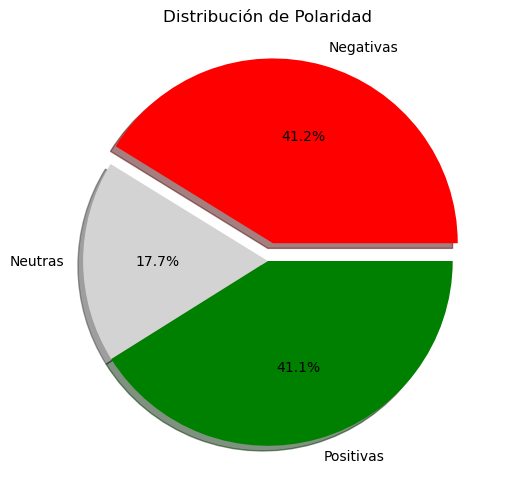

In [53]:
# Clasificar las polaridades en negativas, neutras y positivas
negativas = df_posts_clean[(df_posts_clean['polaridad'] > 2.479968e-14)]
neutras = df_posts_clean[(df_posts_clean['polaridad'] < mediana/2) & (df_posts_clean['polaridad'] <= 0.08)]
positivas = df_posts_clean[(df_posts_clean['polaridad'] < 9.698579e-01)]


# Contar cuántos elementos hay en cada categoría
num_negativas = len(negativas)
num_neutras = len(neutras)
num_positivas = len(positivas)

# Crear la gráfica de pastel
labels = ['Negativas', 'Neutras', 'Positivas']
sizes = [num_negativas, num_neutras, num_positivas]
colors = ['red', 'lightgray', 'green']
explode = (0.1, 0, 0)  # Para resaltar la categoría de negativas

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True)
plt.title('Distribución de Polaridad')
plt.show()